## 化合物聚类

## 类似化合物可能结合到相同的靶点并表现出相似的效果。基于这一相似性原则，可以通过聚类构建化学组。从这样的聚类中，还可以从更大的筛选化合物集中选择出多样化的化合物，以进行进一步的实验测试。

### 内容概要 ¶

- 聚类与 Jarvis-Patrick 算法简介
- 详细解释 Butina 聚类
- 挑选多样化的化合物

###  实践内容目录

- 聚类算法：Butina 算法
-  可视化聚类
- 选择最终的化合物清单
- 附加：运行时间分析

### 聚类与 Jarvis-Patrick 算法简介

聚类可以定义为将一组对象分组的过程，使得同一组中的对象（称为聚类）在某种意义上比其他组（聚类）中的对象更相似。

药物研究中的复合聚类通常基于化合物之间的化学或结构相似性，以找到具有相似性质的组群，并设计出多样化和具有代表性的样本集，以供进一步分析。

 通用程序：

- 方法基于通过相邻点之间的相似性对数据进行聚类。
- 在化学信息学中，化合物通常被编码为分子指纹，相似度可以通过 Tanimoto 相似度来描述（参见 04）。

>  快速提醒：
>
> - 指纹是二进制向量，其中每个比特表示分子中是否存在特定的亚结构片段。
> - . 相似性（或距离）矩阵：分子二进制指纹之间的相似性（或距离）通常使用 Tanimoto 系数来量化，该系数衡量的是共有特征（比特）的数量。
> - 坦尼托系数的值介于零（无相似性）到一（高度相似性）之间。

有众多聚类算法可供选择，其中 Jarvis-Patrick 聚类算法是制药领域最广泛使用的算法之一。

聚类算法由两个参数 K 和 Kmin 定义：

- 计算每个分子最近的 K 个邻近分子集合。
- 两个分子如果聚集在一起，则
  - 他们彼此都在对方的最近邻列表中
  - 他们至少有 Kmin 个他们的 K 个最近邻居是相同的。

聚类算法是确定性的，能够处理大量分子，只需几个小时即可完成。然而，这种方法的一个缺点是，它往往会产生较大的异质聚类（参见上文提到的布蒂纳聚类）。

更多聚类算法可以在 scikit-learn 的聚类模块中找到。

### 详细解释 Butina 聚类方法

但INA 聚类方法是一种基于 Tanimoto 相似度的聚类方法，它是为了识别更小但更均匀的聚类而开发的，前提是（至少）聚类中心点与其他聚类内分子相比，其相似度必须高于给定的阈值。

这些是本聚类方法的重点步骤（见下方的流程图）：

#### 1. 数据准备与复合编码 ¶

- 为了识别化学相似性，输入数据中的化合物（例如，以 SMILES 格式给出）将被编码为分子指纹，例如 RDK5 指纹，这是一种类似于广为人知的 Daylight 指纹的子图指纹（该指纹在原始出版物中被使用）。

#### 2. Tanimoto 相似度（或距离）矩阵

- 指纹之间的相似度是通过 Tanimoto 系数来计算的。
- 矩阵展示了所有可能的分子/指纹对之间的 Tanimoto 相似度（ n∗n 相似度矩阵， n 表示分子数量，仅使用上三角矩阵）。
- 同样，可以计算出距离矩阵（ 1−similarity ）。

#### 3. 分子聚类：质心和排除球体

> 注意：如果使用距离矩阵，分子将根据与聚类质心的最大距离低于指定的阈值而聚集在一起；如果使用相似度矩阵，分子将根据与聚类质心的最小相似度高于指定的阈值而聚集在一起。

- **潜在聚类中心点的识别**
  - 聚类中心是指给定聚类中具有最多邻居的分子。
  - 注释邻近分子：对于每个分子，计算所有与该分子 Tanimoto 距离低于给定阈值的分子数量。
  - 按分子与其邻居的数量降序排列，以便将潜在的聚类中心（即具有最大邻居数量的化合物）置于文件顶部。
- **基于排除球体的聚类**
  - 从排序列表中的第一个分子（质心）开始。
    - 所有 Tanimoto 指数高于或等于用于聚类的截止值的分子，都成为该聚类的成员（在相似性的情况下）。
      - 每个被识别为给定聚类成员的分子都会被标记并从进一步的比较中移除。因此，标记的分子不能成为另一个聚类的中心点或成为另一个聚类的成员。这个过程就像在新生成的聚类周围放置一个排除球体。
      - 一旦列表中的第一个化合物找到了所有其邻居，列表顶部第一个可用的（即未被标记的）化合物就成为了新的聚类中心。
    - 该过程对所有其他未标记的分子按顺序重复进行。
  - 分子在聚类过程结束时未被标记的成为单分子。
    - 请注意，一些被分配为单体的分子可能在给定的 Tanimoto 相似性指数下有邻近分子，但这些邻近分子已被更强的聚类中心排除。

### 挑选多样化的化合物

寻找具有代表性的化合物集合是制药工业中常用的一个概念。

- 假设我们进行了一次虚拟筛选活动，但只有有限的资源来对少数化合物进行确证实验。
- 为了尽可能从该屏幕上获取信息，我们希望选择一个多样化的样本。因此，我们从潜在活性化合物列表中挑选每个化学系列的一个代表。

另一种情景是选择一个系列来获取关于结构-活性关系的信息；也就是说，分子中微小的结构变化如何影响体外活性。## 实用 ¶

### 聚类算法：Butina 算法

应用程序遵循 S. Riniker 和 G. Landrum 的 TDT 教程笔记本的示例。

#### 加载数据并计算指纹

在这个部分，数据被准备，指纹被计算。

In [1]:
import time
import random
from pathlib import Path

import pandas as pd
import numpy
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit import DataStructs
from rdkit.ML.Cluster import Butina
from rdkit.Chem import Draw
from rdkit.Chem import rdFingerprintGenerator

from teachopencadd.utils import seed_everything

seed_everything()  # fix seed to get deterministic outputs

In [2]:
from pathlib import Path
import os

# 获取当前工作目录
HERE = Path(os.getcwd())
DATA = HERE / 'data'
if not DATA.exists():
    DATA.mkdir(parents=True, exist_ok=True)
print(DATA)


/Users/wangyang/Desktop/AIDD/05_Compound_clustering/data


In [6]:
# Load and have a look into data
# Filtered data taken from **023**
compound_df = pd.read_csv(
    HERE / "../03_Molecular_filtration_of_unwanted_substructures/data/data_clean_PAINS.csv",
    # index_col=0,
)
print("Dataframe shape:", compound_df.shape)
compound_df.head()

Dataframe shape: (4135, 6)


,molecule_chembl_id,IC50,smiles,pIC50,ro5_fulfilled,ROMol
0,CHEMBL429743,0.03,COc1cc2nccc(Oc3ccc4c(C(=O)Nc5ccc(Cl)cc5)cccc4c...,10.522879,True,<rdkit.Chem.rdchem.Mol object at 0x7f77fe475a00>
1,CHEMBL5186748,0.12,CNC(=O)c1cc(Oc2ccc(NC(=O)c3nn(-c4ccc(Cl)cc4)cc...,9.920819,True,<rdkit.Chem.rdchem.Mol object at 0x7f77fe475c40>
2,CHEMBL3586072,0.14,CNC(=O)c1ccc(-c2ccc(NC(=O)Nc3cc(Br)cc(C(F)(F)F...,9.853872,True,<rdkit.Chem.rdchem.Mol object at 0x7f7801a4d040>
3,CHEMBL3586071,0.15,CNC(=O)c1cc(-c2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)...,9.823909,True,<rdkit.Chem.rdchem.Mol object at 0x7f7801a4d160>
4,CHEMBL1289494,0.16,COc1cc2nccc(Oc3ccc(NC(=O)Nc4cc(C)on4)c(Cl)c3)c...,9.795880,True,<rdkit.Chem.rdchem.Mol object at 0x7f780483be80>


In [7]:
# 从SMILES中创建分子并以阵列形式存储
compounds = []
#  itertuples ( )每行返回一个( index , column1 , column2 , ...)元组
# 我们不需要索引，所以我们用_代替
# 注意到我们是如何将数据帧切片到我们现在需要的两个列的
for _, chembl_id, smiles in compound_df[["molecule_chembl_id", "smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), chembl_id))
compounds[:5]

[(<rdkit.Chem.rdchem.Mol at 0x7f8aec8420a0>, 'CHEMBL429743'),
 (<rdkit.Chem.rdchem.Mol at 0x7f8aec8424c0>, 'CHEMBL5186748'),
 (<rdkit.Chem.rdchem.Mol at 0x7f8aec8534c0>, 'CHEMBL3586072'),
 (<rdkit.Chem.rdchem.Mol at 0x7f8ae8737280>, 'CHEMBL3586071'),
 (<rdkit.Chem.rdchem.Mol at 0x7f8aee1bde20>, 'CHEMBL1289494')]

In [8]:
# 为所有分子创建指纹
rdkit_gen = rdFingerprintGenerator.GetRDKitFPGenerator(maxPath=5)
fingerprints = [rdkit_gen.GetFingerprint(mol) for mol, idx in compounds]

# 我们拥有多少个化合物/指纹?
print("Number of compounds converted:", len(fingerprints))
print("Fingerprint length per compound:", len(fingerprints[0]))

Number of compounds converted: 4135
Fingerprint length per compound: 2048


## Tanimoto similarity and distance matrix

现在我们已经生成了指纹，接下来进行下一步：识别潜在的聚类中心。为此，我们定义了计算 Tanimoto 相似度和距离矩阵的函数。

In [10]:
def tanimoto_distance_matrix(fp_list):
    """计算指纹列表的距离矩阵"""
    dissimilarity_matrix = []
    # 注意我们是如何故意跳过列表中的第一个和最后一个项目的
    # 因为我们不需要将它们与自己进行比较
    for i in range(1, len(fp_list)):
        # 将当前指纹与列表中所有之前的指纹进行比较
        similarities = DataStructs.BulkTanimotoSimilarity(fp_list[i], fp_list[:i])
        # 由于我们需要一个距离矩阵，对相似度矩阵中的每个元素计算1 - x
        dissimilarity_matrix.extend([1 - x for x in similarities])
    return dissimilarity_matrix

In [12]:
# 示例：计算2个指纹图谱的单次相似度
sim = DataStructs.TanimotoSimilarity(fingerprints[0], fingerprints[1])
print(f"Tanimoto similarity: {sim:.2f}, distance: {1-sim:.2f}")

Tanimoto similarity: 0.39, distance: 0.61


In [13]:
# 示例：计算距离矩阵（距离=1-相似性）
tanimoto_distance_matrix(fingerprints)[0:5]

[0.614963503649635,
 0.7108695652173913,
 0.657580919931857,
 0.6674157303370787,
 0.6223776223776224]

In [14]:
# 旁注：看起来像一个列表而不是一个矩阵。
# 但它是以列表形式存在的三角相似矩阵
n = len(fingerprints)

# 通过n*(n-1)/2计算三角形矩阵中的元素数
elem_triangular_matr = (n * (n - 1)) / 2
print(
    f"Elements in the triangular matrix ({elem_triangular_matr:.0f}) ==",
    f"tanimoto_distance_matrix(fingerprints) ({len(tanimoto_distance_matrix(fingerprints))})",
)
# NBVAL_CHECK_OUTPUT

Elements in the triangular matrix (8547045) == tanimoto_distance_matrix(fingerprints) (8547045)


#### 分子聚类：质心和排除球

在这个部分，我们对分子进行聚类并查看结果。

定义一个聚类函数。

In [15]:
def cluster_fingerprints(fingerprints, cutoff=0.2):
    """Cluster fingerprints
    Parameters:
        fingerprints
        cutoff：聚类的阈值
    """
    # 计算Tanimoto距离矩阵
    distance_matrix = tanimoto_distance_matrix(fingerprints)
    # 现在用实现的Butina算法对数据进行聚类：
    clusters = Butina.ClusterData(distance_matrix, len(fingerprints), cutoff, isDistData=True)
    clusters = sorted(clusters, key=len, reverse=True)
    return clusters

## 根据分子指纹相似度对分子进行聚类。

In [16]:
# 运行数据集的聚类过程
clusters = cluster_fingerprints(fingerprints, cutoff=0.3)

# 给出一个关于聚类的数目及其大小的简短报告
num_clust_g1 = sum(1 for c in clusters if len(c) == 1)
num_clust_g5 = sum(1 for c in clusters if len(c) > 5)
num_clust_g25 = sum(1 for c in clusters if len(c) > 25)
num_clust_g100 = sum(1 for c in clusters if len(c) > 100)

print("total # clusters: ", len(clusters))
print("# clusters with only 1 compound: ", num_clust_g1)
print("# clusters with >5 compounds: ", num_clust_g5)
print("# clusters with >25 compounds: ", num_clust_g25)
print("# clusters with >100 compounds: ", num_clust_g100)
# NBVAL_CHECK_OUTPUT

total # clusters:  709
# clusters with only 1 compound:  337
# clusters with >5 compounds:  175
# clusters with >25 compounds:  33
# clusters with >100 compounds:  2


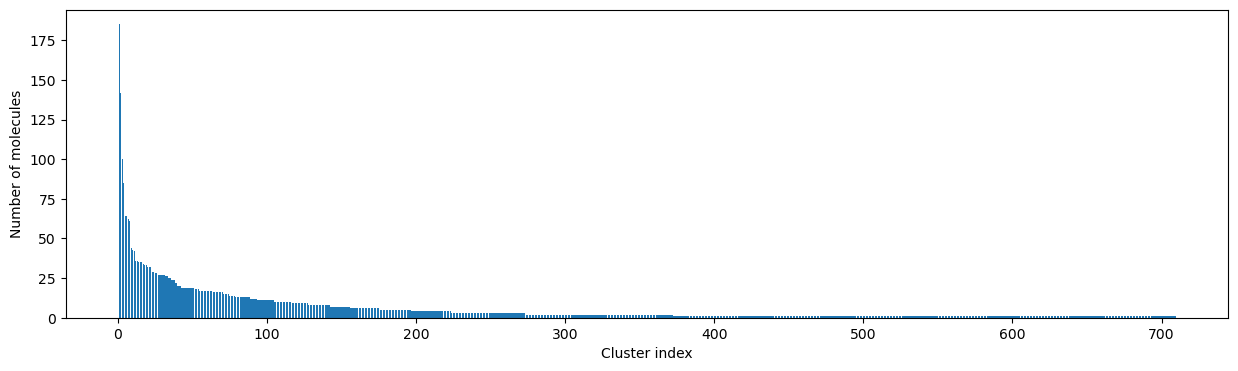

In [17]:
# 绘制聚类结果的大小
fig, ax = plt.subplots(figsize=(15, 4))
ax.set_xlabel("Cluster index")
ax.set_ylabel("Number of molecules")
ax.bar(range(1, len(clusters) + 1), [len(c) for c in clusters], lw=5);

### 如何选择一个合理的截止点？
由于聚类结果取决于用户选择的阈值，我们将更详细地探讨截止点的选择。

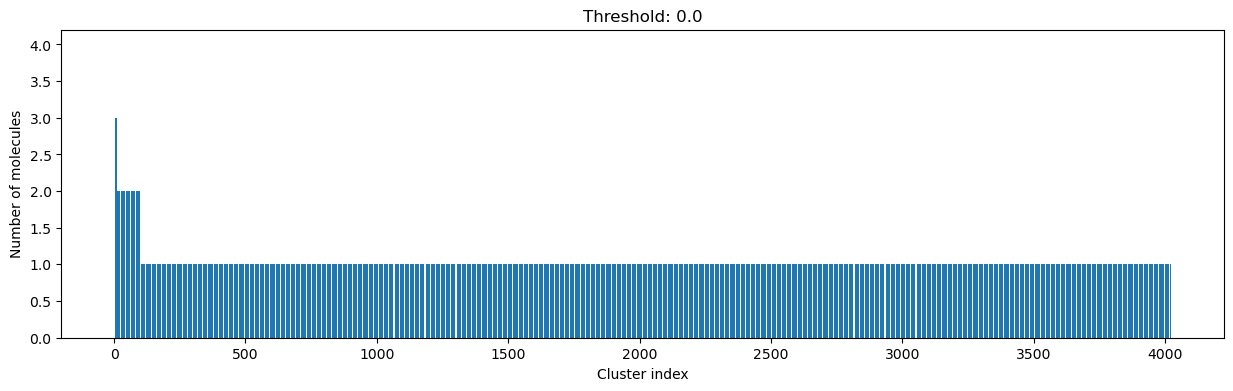

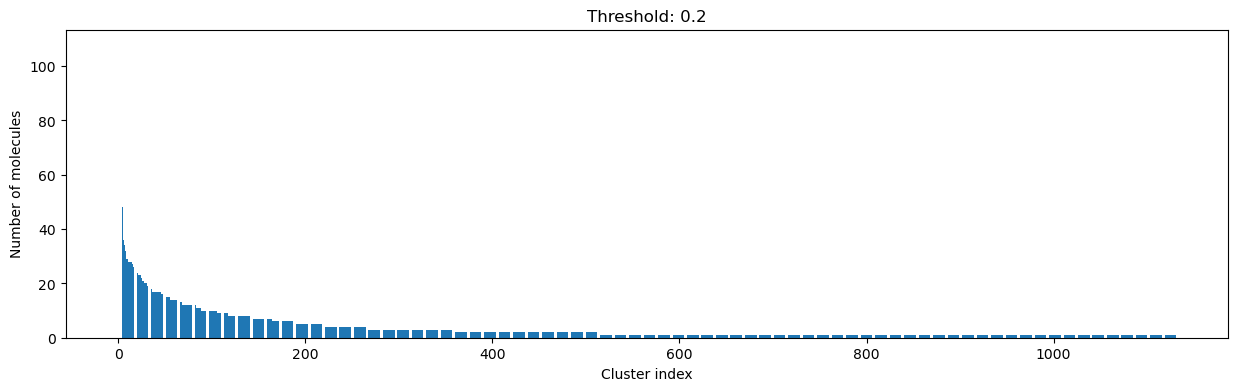

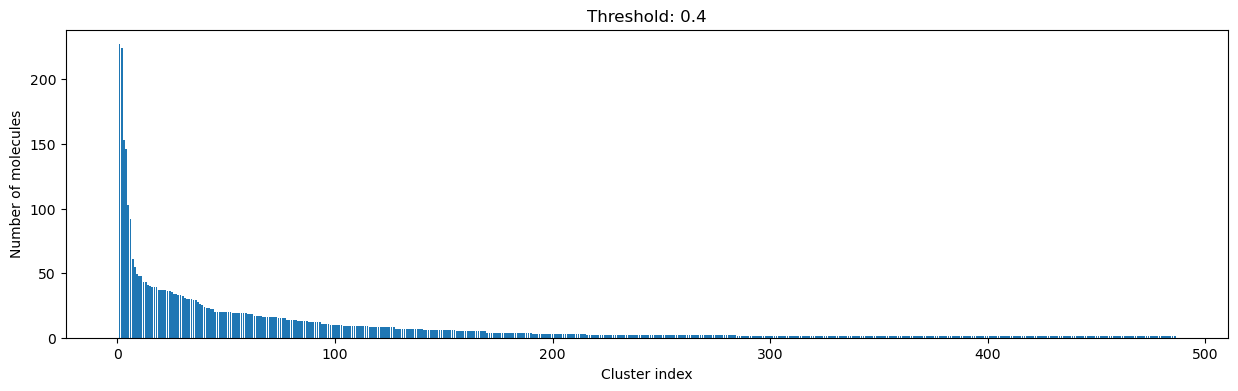

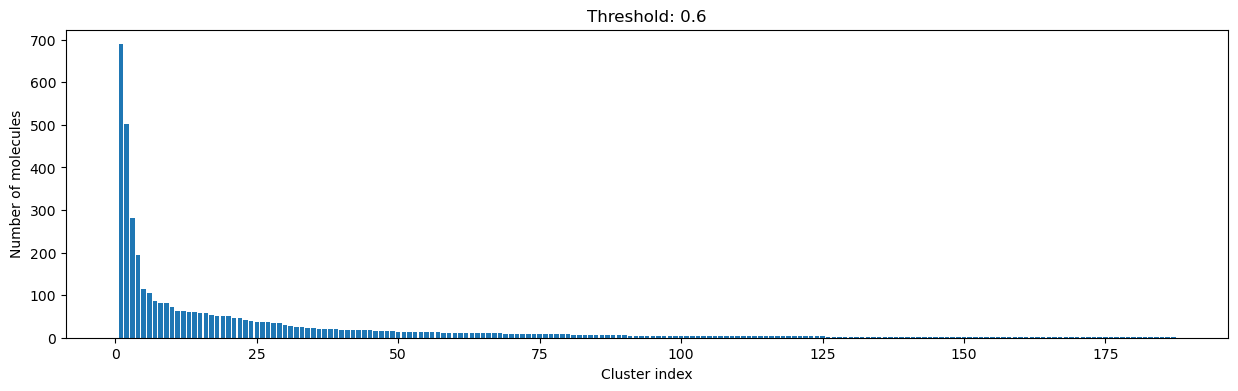

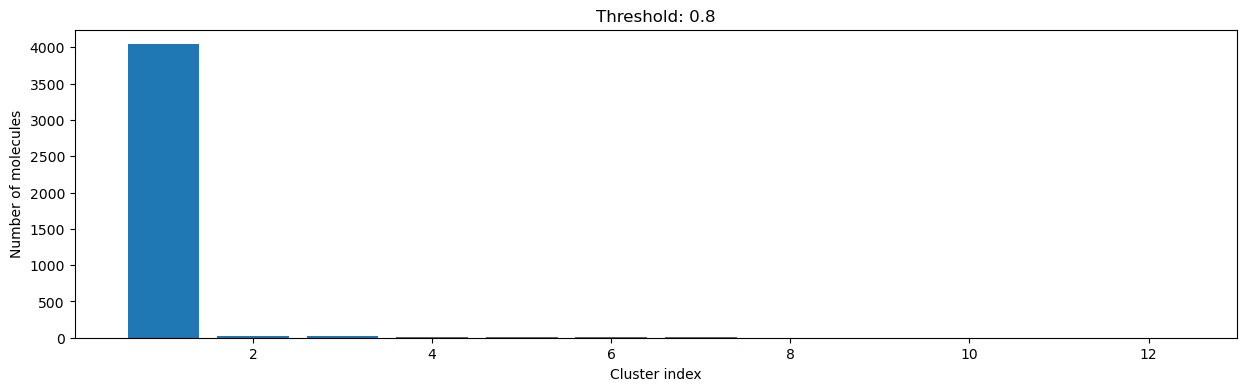

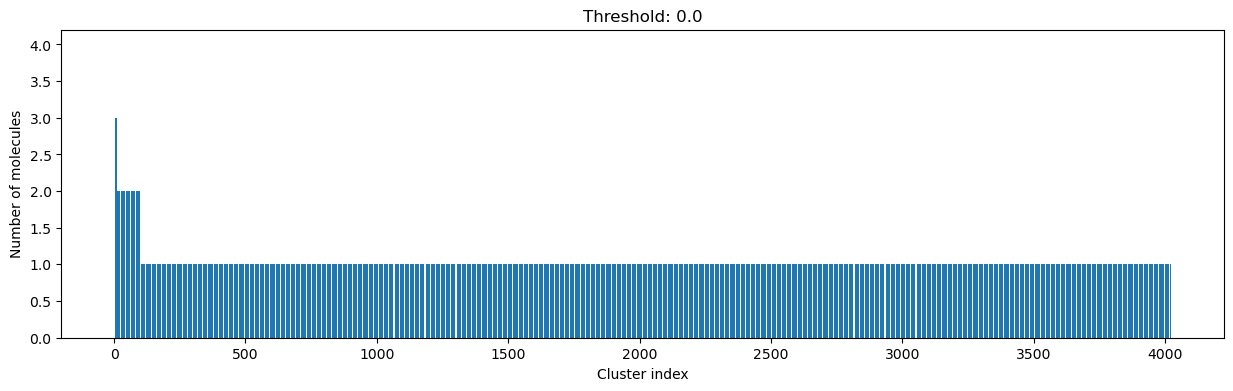

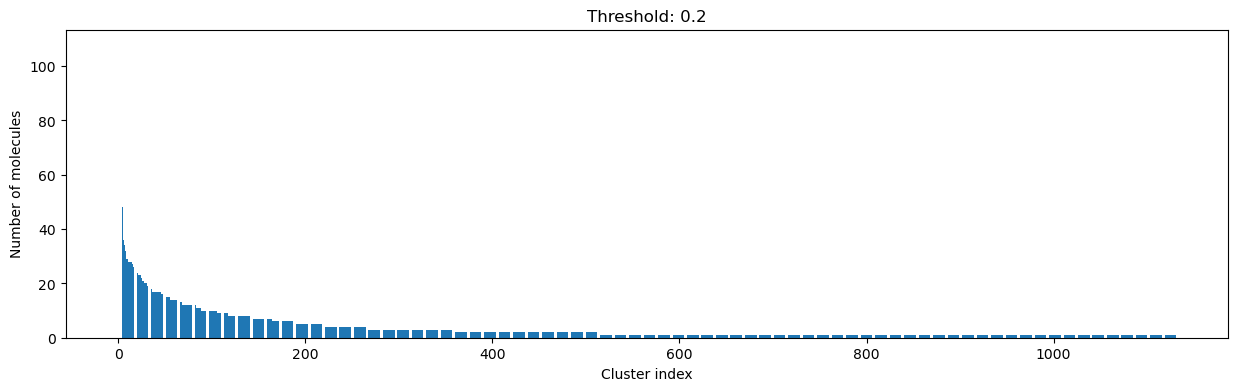

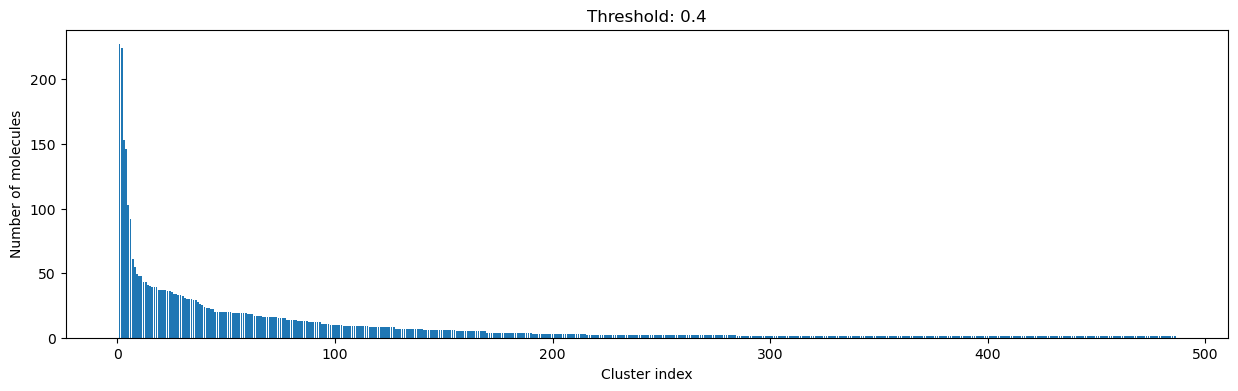

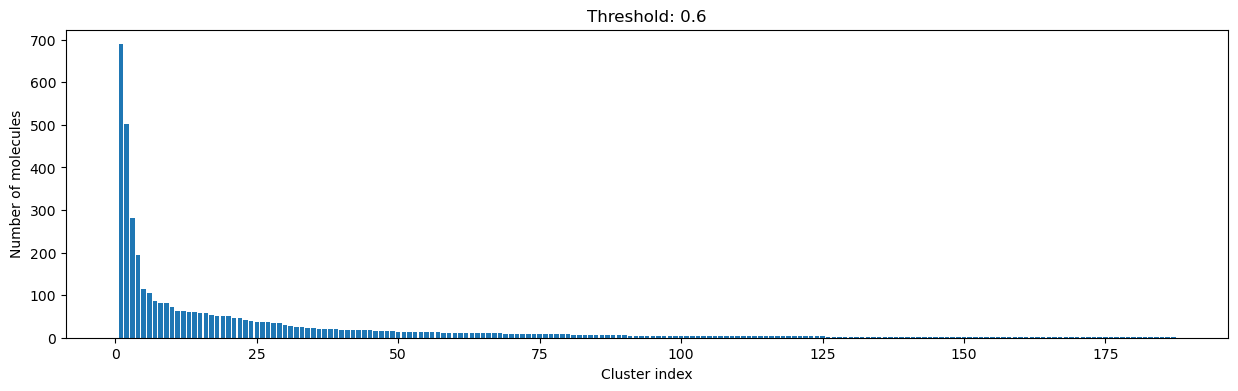

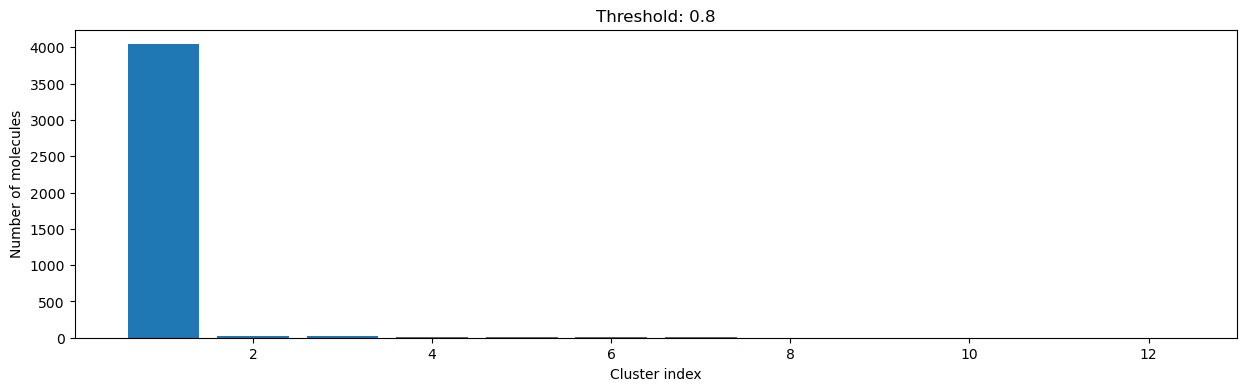

In [18]:
for cutoff in numpy.arange(0.0, 1.0, 0.2):
    clusters = cluster_fingerprints(fingerprints, cutoff=cutoff)
    fig, ax = plt.subplots(figsize=(15, 4))
    ax.set_title(f"Threshold: {cutoff:3.1f}")
    ax.set_xlabel("Cluster index")
    ax.set_ylabel("Number of molecules")
    ax.bar(range(1, len(clusters) + 1), [len(c) for c in clusters], lw=5)
    display(fig)

如您所见，阈值（距离截止值）越高，认为相似的分子就越多，因此聚成的聚类就越少。阈值越低，就会出现更多的小聚类和“单分子”。

> 距离值截止越小，化合物属于同一聚类群所需的相似度就越高。

查看上述图表后，我们决定选择距离阈值为 `0.2` 。单例不多，聚类的大小分布平滑且没有极端情况。

Number of clusters: 1130 from 4135 molecules at distance cut-off 0.20
Number of molecules in largest cluster: 108
Similarity between two random points in same cluster: 0.87
Similarity between two random points in different cluster: 0.25


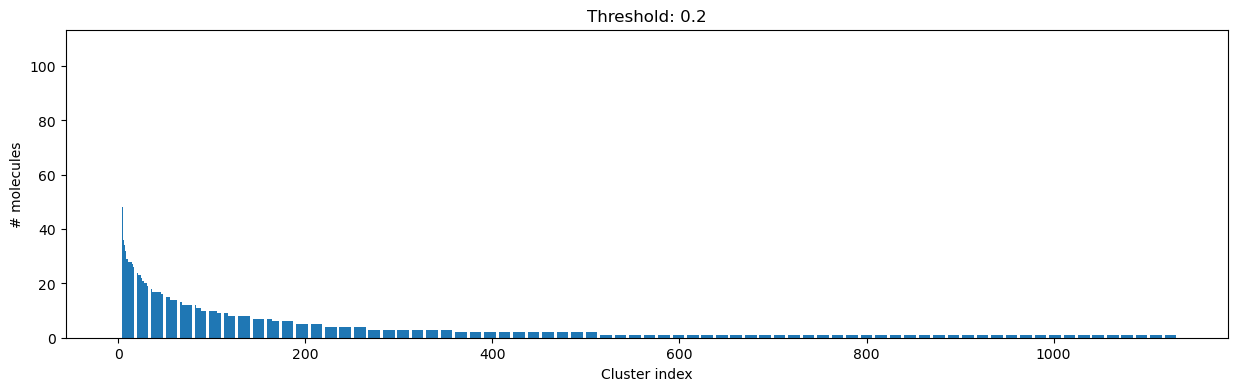

In [19]:
cutoff = 0.2
clusters = cluster_fingerprints(fingerprints, cutoff=cutoff)

# 绘制聚类的大小-保存图
fig, ax = plt.subplots(figsize=(15, 4))
ax.set_xlabel("Cluster index")
ax.set_ylabel("# molecules")
ax.bar(range(1, len(clusters) + 1), [len(c) for c in clusters])
ax.set_title(f"Threshold: {cutoff:3.1f}")
fig.savefig(
    DATA / f"cluster_dist_cutoff_{cutoff:4.2f}.png",
    dpi=300,
    bbox_inches="tight",
    transparent=True,
)

print(
    f"Number of clusters: {len(clusters)} from {len(compounds)} molecules at distance cut-off {cutoff:.2f}"
)
print("Number of molecules in largest cluster:", len(clusters[0]))
print(
    f"Similarity between two random points in same cluster: {DataStructs.TanimotoSimilarity(fingerprints[clusters[0][0]], fingerprints[clusters[0][1]]):.2f}"
)
print(
    f"Similarity between two random points in different cluster: {DataStructs.TanimotoSimilarity(fingerprints[clusters[0][0]], fingerprints[clusters[1][0]]):.2f}"
)

### 可视化聚类

#### "来自最大聚类的 10 个示例 ＿"

现在，让我们更仔细地观察前 10 个第一/最大聚类的分子结构。

Ten molecules from largest cluster:


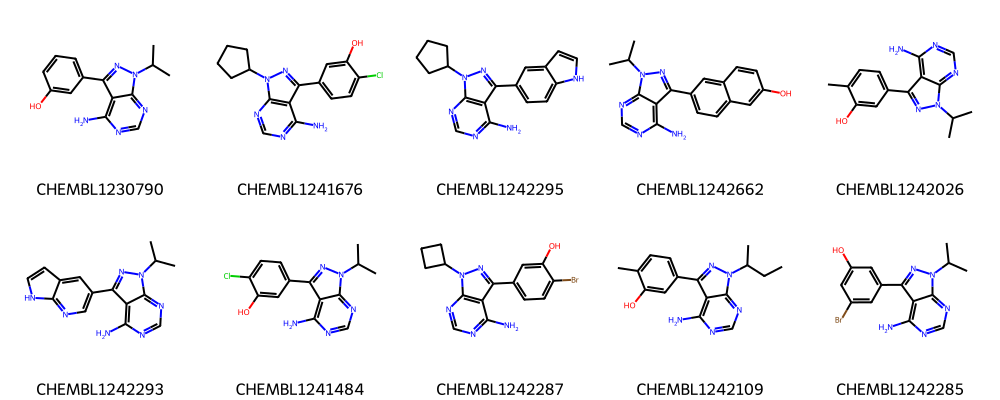

In [20]:
print("Ten molecules from largest cluster:")
# Draw molecules
Draw.MolsToGridImage(
    [compounds[i][0] for i in clusters[0][:10]],
    legends=[compounds[i][1] for i in clusters[0][:10]],
    molsPerRow=5,
)

In [21]:
# 从最大的集群中保存分子，以便其他地方可以使用它
sdf_path = str(DATA / "molecule_set_largest_cluster.sdf")
sdf = Chem.SDWriter(sdf_path)
for index in clusters[0]:
    mol, label = compounds[index]
    # Add label to metadata
    mol.SetProp("_Name", label)
    sdf.write(mol)
sdf.close()

### "来自第二大集群的 10 个示例 ¶"

来自第二大簇的10个分子:


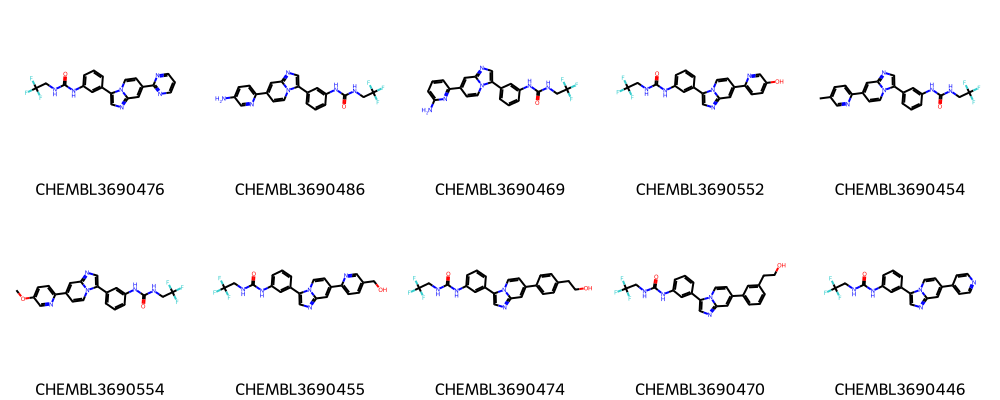

In [22]:
print("来自第二大聚类的10个分子:")
# Draw molecules
Draw.MolsToGridImage(
    [compounds[i][0] for i in clusters[1][:10]],
    legends=[compounds[i][1] for i in clusters[1][:10]],
    molsPerRow=5,
)

前十个分子在各自的聚类中看起来确实彼此相似，许多分子共享一个共同的骨架（通过视觉检测）。

请参阅 Talktorial T006，获取有关如何计算一组分子的最大共同子结构（MCS）的更多信息。

#### “前 10 个聚类的示例 ¶”

为了比较，我们查看前 10 个聚类的中心点。

前10个聚类的10个分子:


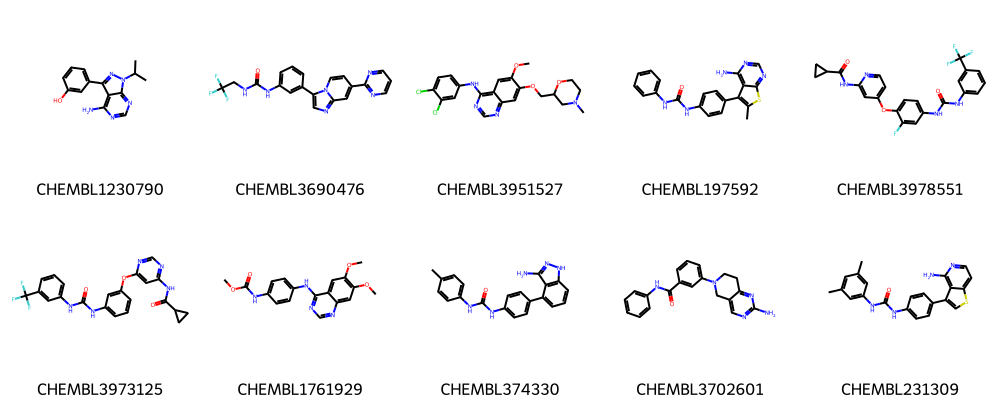

In [24]:
print("前10个聚类的10个分子:")
# Draw molecules
Draw.MolsToGridImage(
    [compounds[clusters[i][0]][0] for i in range(10)],
    legends=[compounds[clusters[i][0]][1] for i in range(10)],
    molsPerRow=5,
)

### 保存前三个聚类的聚类中心为 SVG 文件。

In [25]:
# 生成图像
img = Draw.MolsToGridImage(
    [compounds[clusters[i][0]][0] for i in range(0, 3)],
    legends=[f"Cluster {i}" for i in range(1, 4)],
    subImgSize=(200, 200),
    useSVG=True,
)

# Patch RAW svg数据：将非透明转换为透明背景并设置字体大小
molsvg = img.data.replace("opacity:1.0", "opacity:0.0").replace("12px", "20px")

# 将修改后的SVG数据保存到文件中
with open(DATA / "cluster_representatives.svg", "w") as f:
    f.write(molsvg)

尽管仍有一些相似之处可见，但很明显，不同聚类的中心点之间的差异比同一聚类内的化合物之间的差异更大。

#### 集群内 Tanimoto 相似度

我们还可以查看聚类内 Tanimoto 相似度。

In [26]:
def intra_tanimoto(fps_clusters):
    """计算每个聚类中所有指纹对的Tanimoto相似度的函数"""
    intra_similarity = []
    # 计算每个聚类的类内相似度
    for cluster in fps_clusters:
        # Tanimoto距离矩阵函数转换为相似矩阵( 1 -距离)
        intra_similarity.append([1 - x for x in tanimoto_distance_matrix(cluster)])
    return intra_similarity

In [28]:
# Recompute fingerprints for 10 first clusters
mol_fps_per_cluster = []
for cluster in clusters[:10]:
    mol_fps_per_cluster.append([rdkit_gen.GetFingerprint(compounds[i][0]) for i in cluster])

# 计算聚类相似度
intra_sim = intra_tanimoto(mol_fps_per_cluster)

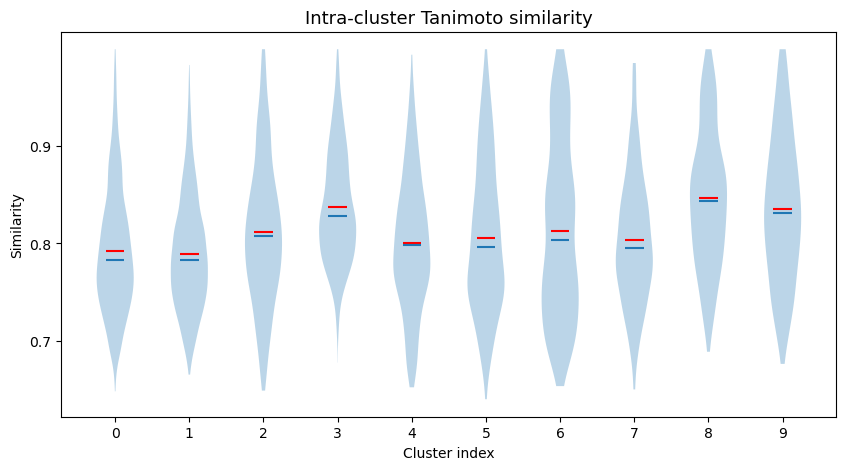

In [29]:
# 具有聚类内相似性的小提琴图

fig, ax = plt.subplots(figsize=(10, 5))
indices = list(range(10))
ax.set_xlabel("Cluster index")
ax.set_ylabel("Similarity")
ax.set_xticks(indices)
ax.set_xticklabels(indices)
ax.set_yticks(numpy.arange(0.6, 1.0, 0.1))
ax.set_title("Intra-cluster Tanimoto similarity", fontsize=13)
r = ax.violinplot(intra_sim, indices, showmeans=True, showmedians=True, showextrema=False)
r["cmeans"].set_color("red")
# 平均值=红色，中位数=蓝色

### 选择最终化合物清单

以下，我们将挑选一个最多包含 1000 个化合物的多样化子集。

为此，我们选取每个聚类的中心点（即每个聚类的第一个分子），然后对于每个聚类（从最大的聚类开始），我们选取与中心点最相似的 10 个分子（如果聚类中剩余的分子少于 10 个，则为 50%），直到选出最多 1000 个化合物。因此，我们得到了每个聚类的代表分子。

目标在于确保从更小的化合物集合中挑选出具有多样性的化合物，以便在验证性试验中进行测试。


正如文中所述：这种方法的理念在于确保多样性（每个聚类的代表）同时从确证性实验的结果中获得一些 SAR（结构-活性关系），即从较大的聚类中保留的相当相似的分子组。

 获取聚类中心。

In [31]:
# 获取每个聚类的聚类中心（每个聚类中的第一个分子）
cluster_centers = [compounds[c[0]] for c in clusters]
# 我们拥有多少个聚类中心/聚类?
print("Number of cluster centers:", len(cluster_centers))

Number of cluster centers: 1130


按大小排序聚类，并在每个聚类中按相似度排序分子。

In [32]:
# 根据聚类内分子的相似性对其进行排序
# 到聚类中心，并根据其大小对聚类进行排序
sorted_clusters = []
for cluster in clusters:
    if len(cluster) <= 1:
        continue  # Singletons
    # else:
    # Compute fingerprints for each cluster element
    sorted_fingerprints = [rdkit_gen.GetFingerprint(compounds[i][0]) for i in cluster]
    # Similarity of all cluster members to the cluster center
    similarities = DataStructs.BulkTanimotoSimilarity(
        sorted_fingerprints[0], sorted_fingerprints[1:]
    )
    # Add index of the molecule to its similarity (centroid excluded!)
    similarities = list(zip(similarities, cluster[1:]))
    # Sort in descending order by similarity
    similarities.sort(reverse=True)
    # Save cluster size and index of molecules in clusters_sort
    sorted_clusters.append((len(similarities), [i for _, i in similarities]))
    # Sort in descending order by cluster size
    sorted_clusters.sort(reverse=True)

## 最多选择 1000 种化合物。

In [33]:
# 计算选定的分子，先选择集群中心
selected_molecules = cluster_centers.copy()
# 从最大的一个开始，取每个聚类的10个分子（或最多50%）
index = 0
pending = 1000 - len(selected_molecules)
while pending > 0 and index < len(sorted_clusters):
    # Take indices of sorted clusters
    tmp_cluster = sorted_clusters[index][1]
    # If the first cluster is > 10 big then take exactly 10 compounds
    if sorted_clusters[index][0] > 10:
        num_compounds = 10
    # If smaller, take half of the molecules
    else:
        num_compounds = int(0.5 * len(tmp_cluster)) + 1
    if num_compounds > pending:
        num_compounds = pending
    # Write picked molecules and their structures into list of lists called picked_fps
    selected_molecules += [compounds[i] for i in tmp_cluster[:num_compounds]]
    index += 1
    pending = 1000 - len(selected_molecules)
print("# Selected molecules:", len(selected_molecules))
# NBVAL_CHECK_OUTPUT

# Selected molecules: 1130


这组多样化的分子现在可用于实验测试。

附加：运行时间分析
在讲义结束时，我们可以调整数据集的大小，观察 Butina 聚类算法的运行时间如何变化。

In [34]:
# Reuse old dataset
sampled_mols = compounds.copy()

请注意，您可以尝试更大的数据集，但数据点超过 10000 个时，内存和时间消耗会相当大（这就是我们为什么在那里停止的原因）。

In [35]:
# 时间计算的辅助函数
def measure_runtime(sampled_mols):
    start_time = time.time()
    sampled_fingerprints = [rdkit_gen.GetFingerprint(m) for m, idx in sampled_mols]
    # 用数据集运行聚类
    sampled_clusters = cluster_fingerprints(sampled_fingerprints, cutoff=0.3)
    return time.time() - start_time

In [36]:
len(sampled_mols)
# NBVAL_CHECK_OUTPUT

4135

In [37]:
sample_sizes = [100, 500, 1000, 2000, 4000]
runtimes = []
# 采取有放回的随机样本
for size in sample_sizes:
    time_taken = measure_runtime(random.sample(sampled_mols, size))
    print(f"Dataset size {size}, time {time_taken:4.2f} seconds")
    runtimes.append(time_taken)

Dataset size 100, time 0.07 seconds
Dataset size 500, time 0.34 seconds
Dataset size 1000, time 0.95 seconds
Dataset size 2000, time 2.10 seconds
Dataset size 4000, time 4.89 seconds


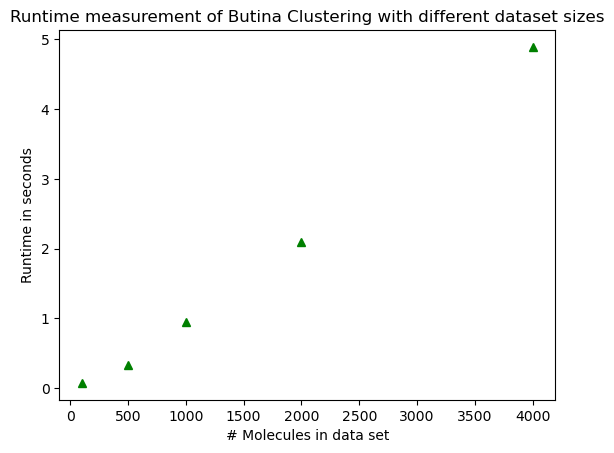

In [38]:
fig, ax = plt.subplots()
ax.set_title("Runtime measurement of Butina Clustering with different dataset sizes")
ax.set_xlabel("# Molecules in data set")
ax.set_ylabel("Runtime in seconds")
ax.plot(sample_sizes, runtimes, "g^");

注意，运行时间并不完全与样本大小成正比！它增长得更快！

 Butina 算法来聚类化合物数据集，并讨论了如何选择合理的聚类阈值。通过观察不同聚类中的示例化合物以及检查聚类内相似性，对聚类进行了合理化。最后，利用这些聚类选择了一个多样化的化合物子集。